In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rgb_images = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.startswith("shadow"):
            image = cv2.imread(os.path.join(dirname, filename))
            rgb_images.append(image)

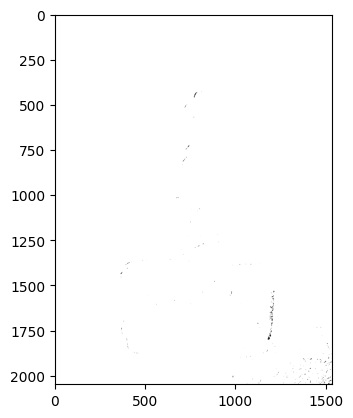

In [4]:
image = rgb_images[0]

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to create a binary mask of the shadows
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# Dilate the mask to cover shadow edges
kernel = np.ones((7,7),np.uint8)
dilated_mask = cv2.dilate(mask, kernel, iterations=1)

# Inpaint the image using the dilated mask
# result = cv2.inpaint(image, dilated_mask, 21, cv2.INPAINT_TELEA)

# Save and display the result
plt.imshow(mask, cmap="gray")
# plt.imshow(mask)

In [5]:
def plt_img(img_data, cmap='viridis'):
    plt.imshow(img_data, cmap=cmap)
    plt.axis('on')
    plt.show()

In [6]:
img = rgb_images[0]

rgb_planes = cv2.split(img)

steps = []

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    steps.append(plane)
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    steps.append(dilated_img)
    bg_img = cv2.medianBlur(dilated_img, 21)
    steps.append(bg_img)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    steps.append(diff_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    steps.append(norm_img)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)
steps.append(result)
steps.append(result_norm)

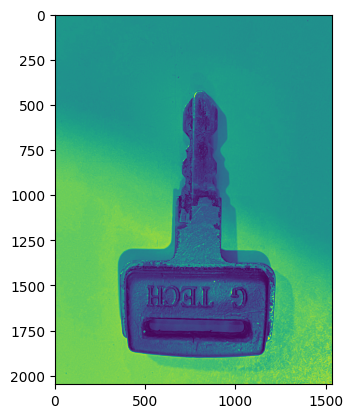

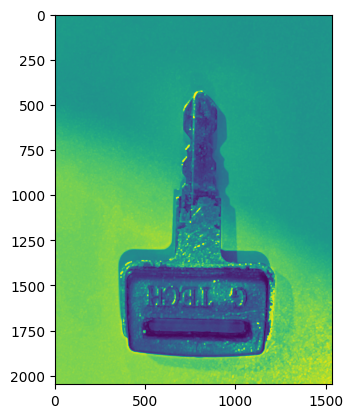

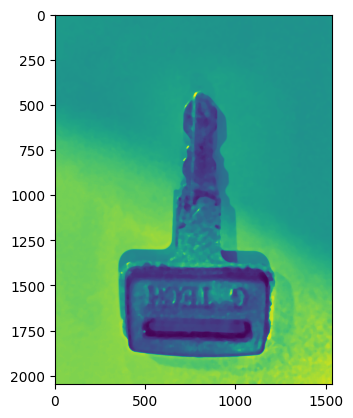

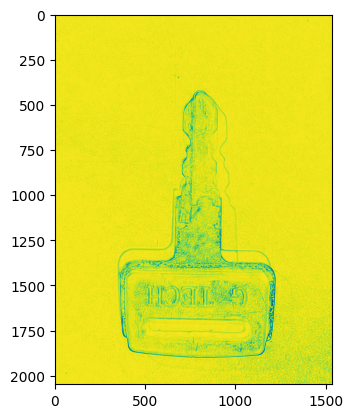

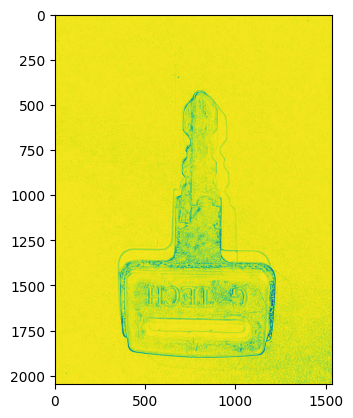

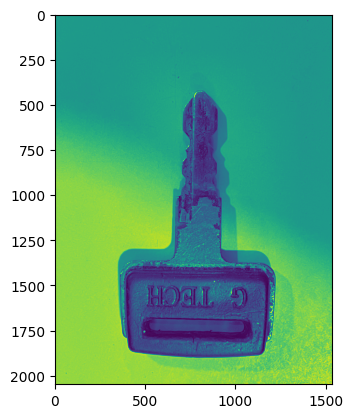

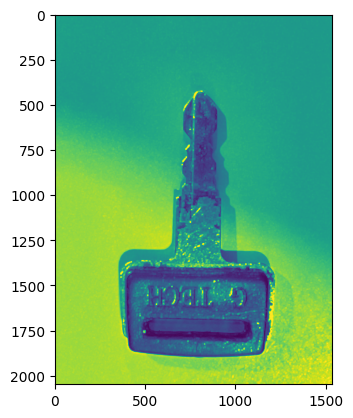

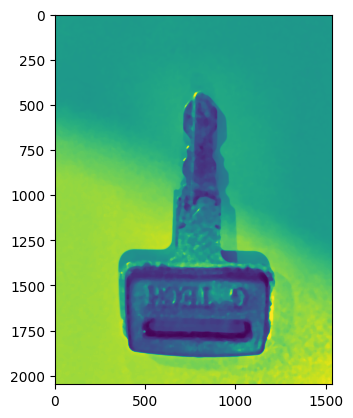

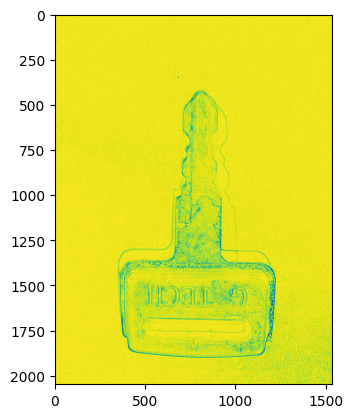

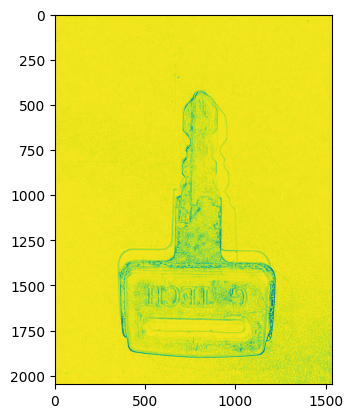

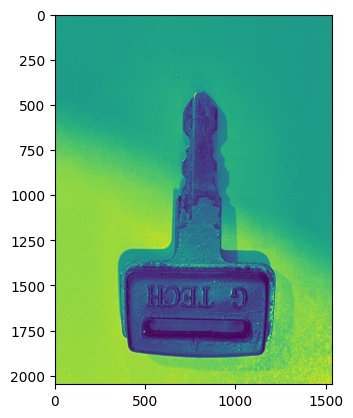

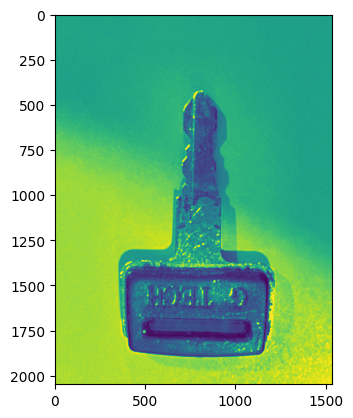

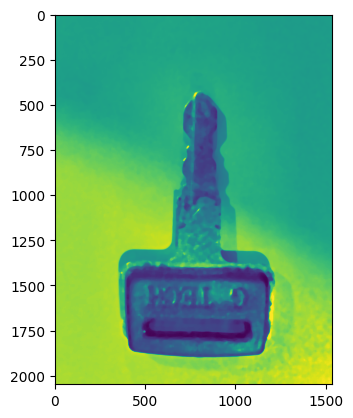

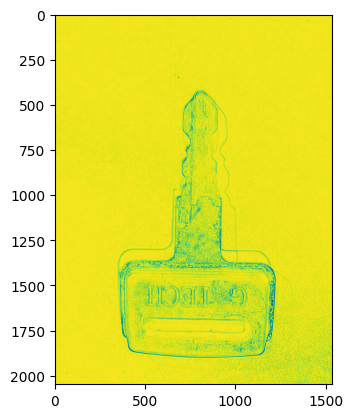

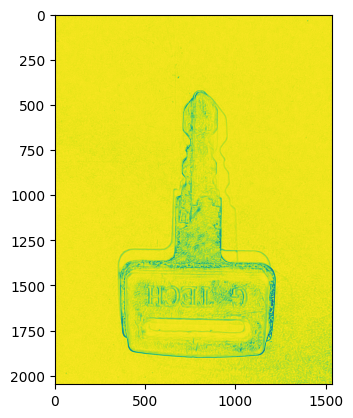

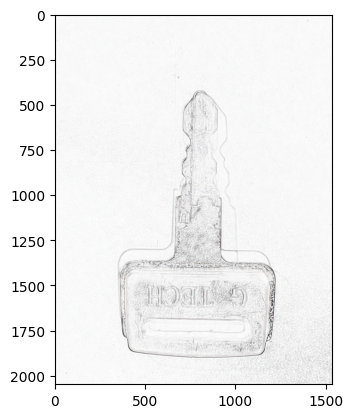

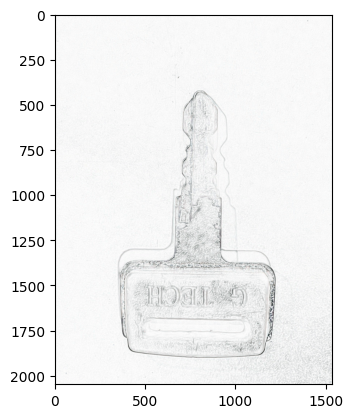

In [7]:
for step in steps:
    plt_img(step)

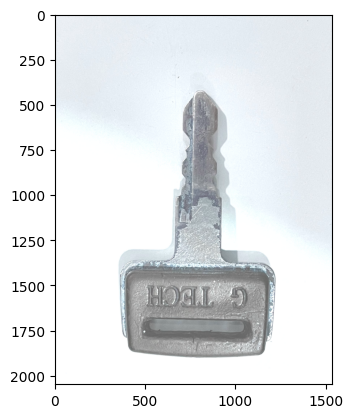

In [8]:
image = rgb_images[0]

# Define the brightness and contrast parameters
brightness = 100  # Range from -255 to 255
contrast = 1.0   # Range from 0.0 to 3.0

# Apply the brightness and contrast adjustments
adjusted_image = cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)

plt_img(adjusted_image)

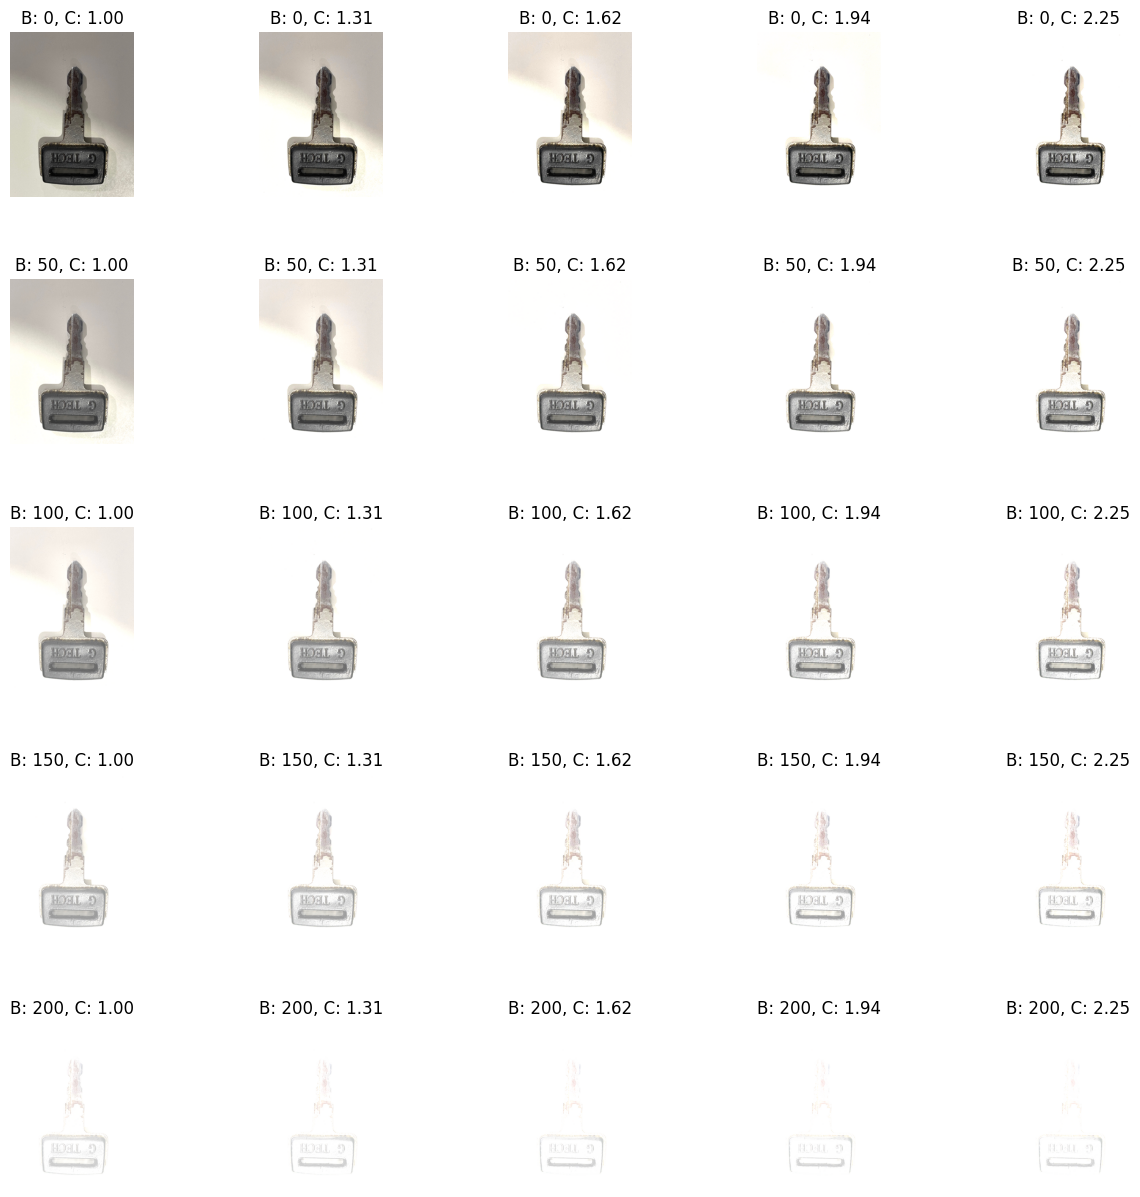

In [9]:
def adjust_brightness_contrast(image, brightness=0, contrast=1.0):
    """
    Adjusts the brightness and contrast of an image.
    
    Parameters:
    image (numpy.ndarray): Input image
    brightness (int): Brightness adjustment (-255 to 255)
    contrast (float): Contrast adjustment (0.0 to 3.0)
    
    Returns:
    numpy.ndarray: Adjusted image
    """
    return cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)

def plot_brightness_contrast_grid(image):
    """
    Plots a 5x5 grid of images with varying brightness and contrast.
    
    Parameters:
    image (numpy.ndarray): Input image
    """
    # Create a 5x5 grid for plotting
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # Brightness and contrast ranges
    brightness_values = np.linspace(0, 200, 5)
    contrast_values = np.linspace(1, 2.25, 5)
    
    for i, brightness in enumerate(brightness_values):
        for j, contrast in enumerate(contrast_values):
            adjusted_image = adjust_brightness_contrast(image, brightness=int(brightness), contrast=contrast)
            ax = axes[i, j]
            ax.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))
            ax.set_title(f"B: {int(brightness)}, C: {contrast:.2f}")
            ax.axis('off')
    
    plt.show()

# Load the image
image = rgb_images[0]

# Plot the grid of images with varying brightness and contrast
plot_brightness_contrast_grid(image)

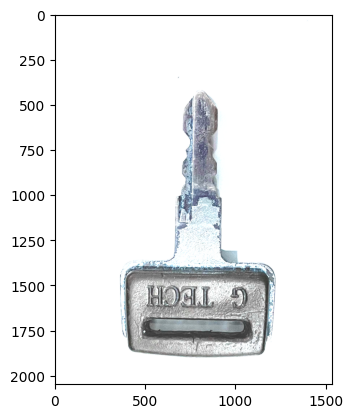

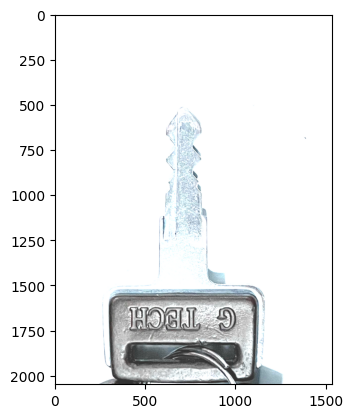

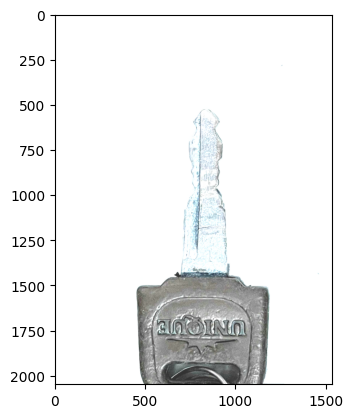

[None, None, None]

In [13]:
# Based on data we can estimate that at brightness 50 and contrast 2.25, we can hide the shadow of the key 
# while maintaining it's features.

brightness=50
contrast=2.25

shadowless = []

for image in rgb_images:
    modified = adjust_brightness_contrast(image, brightness, contrast)
    shadowless.append(modified)
    
[plt_img(image) for image in shadowless]

# We can than use these images for the contour extraction pipeline